Podczas wykonywania DFT za każdym razem dzielę przez N, a odwrotnej DFT mnożę przez N. Robię tak, żeby przyjąć konwencję stosowaną na wykładzie (w bibliotece `numpy` jest odmienna). Dzięki temu wszystkie wzory z wykładu mają tu zastosowanie.

![zadanie](tasks/1.png)

In [3]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

N = 4

s1 = np.array([2, 3, 1, 0])
s2 = np.array([0, 3, 1, 0])

SIGNALS = [s1, s2]
SIGNAL_NAMES = ["$s_1$", "$s_2$"]


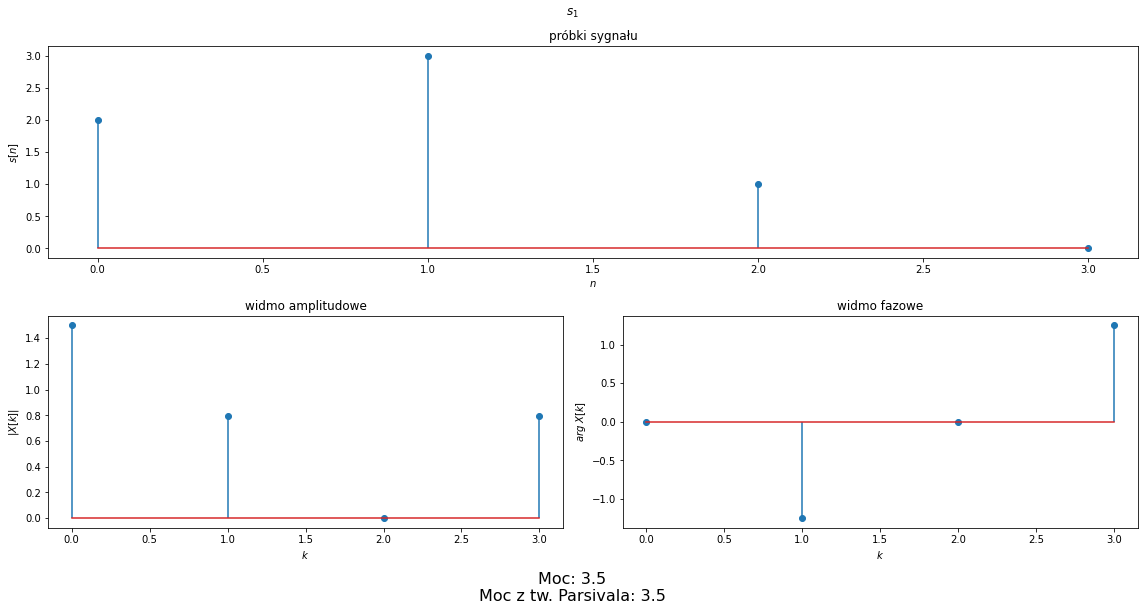

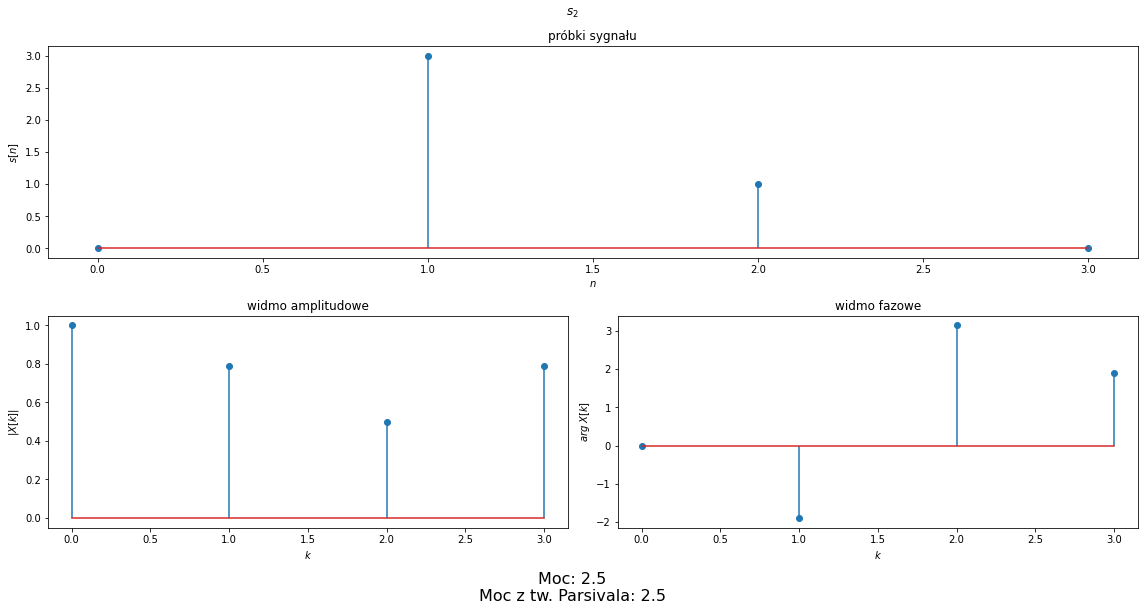

In [8]:
# 1 a)

for s, name in zip(SIGNALS, SIGNAL_NAMES):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(f"{name}")
    gs = GridSpec(ncols=2, nrows=2, figure=fig)

    ax_s = fig.add_subplot(gs[0, :])
    ax_ampl = fig.add_subplot(gs[1, 0])
    ax_phase = fig.add_subplot(gs[1, 1])

    ax_s.stem(s)
    ax_s.set_title("próbki sygnału")
    ax_s.set_xlabel("$n$")
    ax_s.set_ylabel("$s[n]$")

    s_fft = np.fft.fft(s) / N

    s_amplitude_spectrum = np.abs(s_fft)
    s_phase_spectrum = np.angle(s_fft)

    ax_ampl.stem(s_amplitude_spectrum)
    ax_ampl.set_title("widmo amplitudowe")
    ax_ampl.set_xlabel("$k$")
    ax_ampl.set_ylabel("$|X[k]|$")

    ax_phase.stem(s_phase_spectrum)
    ax_phase.set_title("widmo fazowe")
    ax_phase.set_xlabel("$k$")
    ax_phase.set_ylabel("$arg \\; X[k]$")

    power = np.mean(np.square(s))
    power_parsival = np.sum(np.square(s_amplitude_spectrum))

    bot_text = f"Moc: {power}\nMoc z tw. Parsivala: {power_parsival}"
    fig.text(0.5, 0, bot_text, ha="center", va="top", fontsize=16)

    fig.tight_layout()
    plt.show()


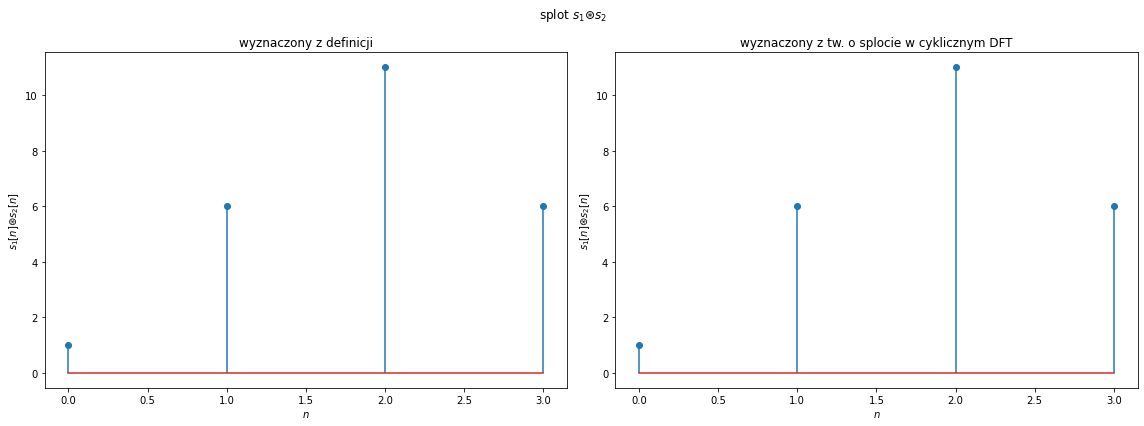

In [7]:
# 1) b

def circular_convolve(x1: np.ndarray, x2: np.ndarray):
    N = len(x1)
    convolution = [0] * N
    for n in range(N):
        for m in range(len(x1)):
            m2 = (n - m) % N
            convolution[n] += x1[m] * x2[m2]
    return np.array(convolution)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("splot $s_1 \\circledast s_2$")
fig.set_size_inches(16, 6)

convolution = circular_convolve(s1, s2)
ax1.stem(convolution)
ax1.set_title("wyznaczony z definicji")

s1_fft = np.fft.fft(s1) / N
s2_fft = np.fft.fft(s2) / N
convolution_from_fft = np.real(np.fft.ifft(s1_fft * s2_fft) * N) * N

ax2.stem(convolution_from_fft)
ax2.set_title("wyznaczony z tw. o splocie w cyklicznym DFT")

for ax in [ax1, ax2]:
    ax.set_xlabel("$n$")
    ax.set_ylabel("$s_1[n] \\circledast s_2[n]$")

fig.tight_layout()
plt.show()
